In [ ]:
!pip install tensorflow

tesorflow: opensource library developed by google for ml and dl
- automatic differentiation
- Inter

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.19.0'

In [ ]:
#Tensor basics
a = tf.constant(10)
a

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [ ]:
a = tf.constant(10)
b = tf.constant(20)
c = a + b
c

<tf.Tensor: shape=(), dtype=int32, numpy=30>

In [ ]:
a = tf.constant(10)
b = tf.constant(20)
c = a / b
c

<tf.Tensor: shape=(), dtype=float64, numpy=0.5>

In [ ]:
zeros = tf.zeros(shape=(2,3))
zeros

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [ ]:
tf.multiply(a,b)


<tf.Tensor: shape=(), dtype=int32, numpy=200>

In [ ]:
tf.reduce_mean(a)

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [ ]:
import numpy as np
np_array = np.array([[1,2],[3,4]])
np_array

array([[1, 2],
       [3, 4]])

In [ ]:
tf_tensor = tf.convert_to_tensor(np_array, dtype=tf.float32)
tf_tensor

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

In [ ]:
#gradient calculations: Differenciation
x = tf.Variable(5.0)
with tf.GradientTape() as tape:
  y = x**2
  dy_dx = tape.gradient(y, x)
print(dy_dx.numpy)

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=10.0>>


Keras : high-level deep learning api built on the top of tensorflow provide simple, modular, user friendly way to build , train, evaluateand deploy neural network features: user friendly

In [ ]:
from tensorflow import keras
keras.__version__

'3.10.0'

Neural network model lifecycle:
model.compile(): define optimizer & meterics
- mode.fit():Training
_

single perceptron model

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
mnist = tf.keras.datasets.mnist
mnist

<module 'keras.datasets.mnist' from '/usr/local/lib/python3.12/dist-packages/keras/datasets/mnist/__init__.py'>

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Normalize
x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
# Model Building for single layer perceptron
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, activation = 'softmax')])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#compile the model
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
model.fit(x_train, y_train, epochs =29)

Epoch 1/29
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8133 - loss: 0.7154
Epoch 2/29
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9145 - loss: 0.3059
Epoch 3/29
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9191 - loss: 0.2872
Epoch 4/29
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9237 - loss: 0.2739
Epoch 5/29
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9256 - loss: 0.2669
Epoch 6/29
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9249 - loss: 0.2674
Epoch 7/29
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9264 - loss: 0.2615
Epoch 8/29
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9305 - loss: 0.2493
Epoch 9/29
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9298 - loss: 0.2526
Epoch 10/29
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9288 - loss: 0.2531
Epoch 11/29
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9330 - loss: 0.2428
Epoch 12/29
1875/1875 ━━━━━━

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss, test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9172 - loss: 0.3066
0.2720743417739868 0.9283000230789185


Multilinear Perceptron

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_trian, y_trian),(x_test, y_test) = mnist.load_data()

In [ ]:
x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
#model Building
tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),# Input layer
    tf.keras.layers.Dense(256, activation = 'sigmoid'), # hidden layer 1
    tf.keras.layers.Dense(128, activation = 'sigmoid'), # hidden layer 2
    tf.keras.layers.Dense(10, activation = 'softmax') # output layer
])

<Sequential name=sequential_1, built=True>

In [ ]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=30)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0976 - loss: 2.5250
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6544 - loss: 2.0043
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7395 - loss: 1.8095
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7568 - loss: 1.6430
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7710 - loss: 1.4960
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7847 - loss: 1.3750
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7975 - loss: 1.2616
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8096 - loss: 1.1675
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8153 - loss: 1.0866
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8222 - loss: 1.0185
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8280 - loss: 0.9571
Epoch 12/30
1875/1875 ━━━━━━━━

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss, test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7118 - loss: 90.0257
88.09750366210938 0.7261000275611877


ANN MODEL BUILDING ON CANCER DATASET

In [ ]:
import pandas as  pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
# load dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
x=pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
y=cancer['target']

In [ ]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# train  test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
#feature scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#model building
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=30))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6309 - loss: 0.6234
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9015 - loss: 0.3935
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9459 - loss: 0.2572
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9517 - loss: 0.1781  
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9442 - loss: 0.1808
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9747 - loss: 0.1196  
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9695 - loss: 0.1140
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9846 - loss: 0.0827
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9779 - loss: 0.0968
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9785 - loss: 0.0780


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2 , verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9889 - loss: 0.0715 - val_accuracy: 0.9780 - val_loss: 0.1088
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9878 - loss: 0.0640 - val_accuracy: 0.9780 - val_loss: 0.1031
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9889 - loss: 0.0589 - val_accuracy: 0.9780 - val_loss: 0.0985
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9906 - loss: 0.0584 - val_accuracy: 0.9780 - val_loss: 0.0957
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9933 - loss: 0.0374 - val_accuracy: 0.9780 - val_loss: 0.0919
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9869 - loss: 0.0500 - val_accuracy: 0.9780 - val_loss: 0.0899
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9920 - loss: 0.0422 - val_accuracy: 0.9780 - val_loss: 0.0879
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9900 - loss: 0.0457 - val_accuracy: 0.

In [ ]:
y_pred = model.predict(x_test)
y_pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[8.9188439e-01],
       [7.2415425e-03],
       [3.7680421e-02],
       [9.8649383e-01],
       [9.9751353e-01],
       [1.6939380e-06],
       [5.5752753e-05],
       [1.7242326e-01],
       [4.6568003e-01],
       [9.9412924e-01],
       [9.4897008e-01],
       [9.4470069e-02],
       [9.8016411e-01],
       [2.3159985e-01],
       [9.9633062e-01],
       [2.1398097e-02],
       [9.8892367e-01],
       [9.9962121e-01],
       [9.9995792e-01],
       [4.6594077e-04],
       [8.4126931e-01],
       [9.8319072e-01],
       [2.4774641e-05],
       [9.9968487e-01],
       [9.9536288e-01],
       [9.8462695e-01],
       [9.9014127e-01],
       [9.9117774e-01],
       [9.9015176e-01],
       [1.2777622e-03],
       [9.9571675e-01],
       [9.9818629e-01],
       [9.9139297e-01],
       [9.9038392e-01],
       [9.9852484e-01],
       [9.9385619e-01],
       [1.6792308e-01],
       [9.8995918e-01],
       [8.7693483e-03],
       [8.6616546e-01],
       [9.9837422e-01],
       [6.229316

In [ ]:
y_pred =model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
y_pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
    

In [ ]:
acc=accuracy_score(y_test, y_pred)
acc

0.9824561403508771

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



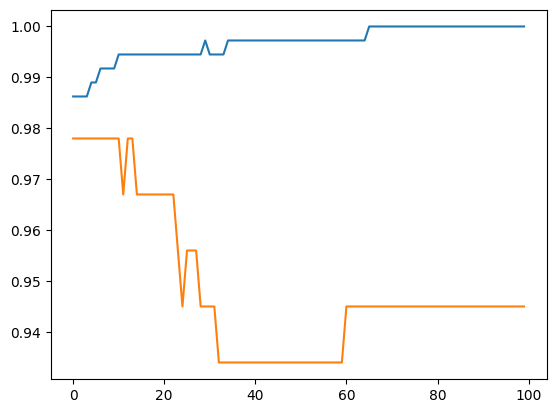

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

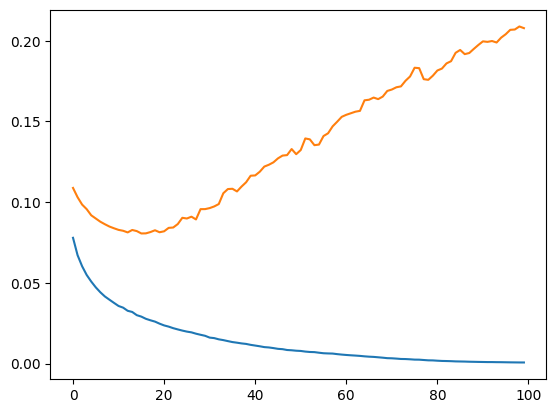

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss, test_acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9701 - loss: 0.0805 
0.07011085003614426 0.9824561476707458


In [ ]:
test_acc

0.9824561476707458

CNN *convolutional neural network

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
#preprocessing
#reshape to samples, heights, width, channels
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [ ]:
#normalize
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.

In [ ]:
#one - hot encoding labels (0-9)
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [ ]:
y_train.shape

(60000, 10)

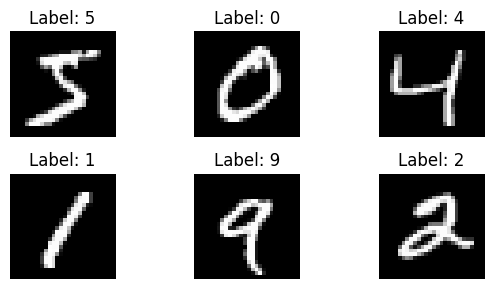

In [ ]:
#visualize input images
plt.figure(figsize=(6,3))
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(x_train[i].reshape(28,28), cmap='gray')
  plt.title(f'Label: {np.argmax(y_train[i])}')
  plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
#build model
model = Sequential()
#block 1
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
#block 2
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

#flatten
model.add(Flatten())
# fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
#output layer
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#train model
history = model.fit(x_train, y_train,epochs=10, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 46s 107ms/step - accuracy: 0.7827 - loss: 0.6942 - val_accuracy: 0.9771 - val_loss: 0.0760
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 112ms/step - accuracy: 0.9662 - loss: 0.1100 - val_accuracy: 0.9845 - val_loss: 0.0524
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 47s 124ms/step - accuracy: 0.9754 - loss: 0.0794 - val_accuracy: 0.9869 - val_loss: 0.0454
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 36s 97ms/step - accuracy: 0.9810 - loss: 0.0617 - val_accuracy: 0.9878 - val_loss: 0.0417
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 36s 96ms/step - accuracy: 0.9840 - loss: 0.0524 - val_accuracy: 0.9890 - val_loss: 0.0399
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 54s 132ms/step - accuracy: 0.9861 - loss: 0.0460 - val_accuracy: 0.9895 - val_loss: 0.0371
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 69s 96ms/step - accuracy: 0.9875 - loss: 0.0403 - val_accuracy: 0.9898 - val_loss: 0.0346
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 98ms/step - accuracy: 0.9894 - loss: 0.034

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9898 - loss: 0.0345


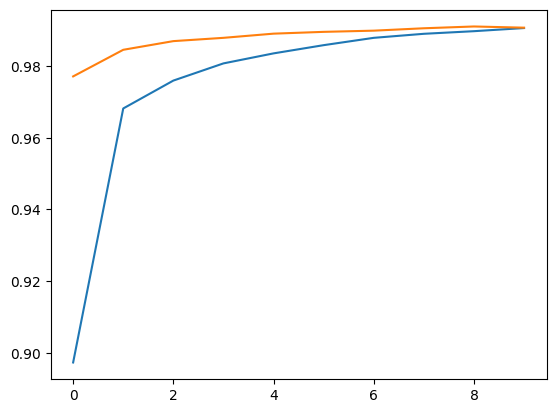

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

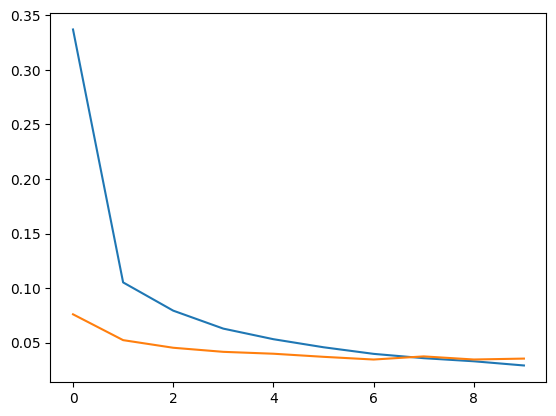

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()